In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

In [3]:
# Custom Dataset Class
class MVTecGoodDataset(Dataset):
    def __init__(self, good_image_dir, transform=None):
        self.good_image_dir = good_image_dir
        self.transform = transform
        self.images = []

        # Load good images
        for img_file in os.listdir(good_image_dir):
            img_path = os.path.join(good_image_dir, img_file)
            if os.path.isfile(img_path):
                self.images.append(img_path)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

In [4]:
good_image_dir = "../datasets/mvtec/hazelnut/train/good/"
train_dataset = MVTecGoodDataset(good_image_dir=good_image_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

In [5]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),
            nn.ReLU(True),
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()  # Normalize output to [0, 1] range
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
autoencoder = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

In [7]:
num_epochs = 20
for epoch in range(num_epochs):
    autoencoder.train()
    running_loss = 0.0
    for images in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        images = images.to(device)
        
        # Forward pass
        outputs = autoencoder(images)
        loss = criterion(outputs, images)  # MSE loss between original and reconstructed image
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

# Save the trained autoencoder model
torch.save(autoencoder.state_dict(), "autoencoder_reconstruction.pth")

Epoch 1/20: 100%|██████████| 49/49 [00:24<00:00,  1.98it/s]


Epoch [1/20], Loss: 0.0193


Epoch 2/20: 100%|██████████| 49/49 [00:24<00:00,  2.04it/s]


Epoch [2/20], Loss: 0.0044


Epoch 3/20: 100%|██████████| 49/49 [00:23<00:00,  2.12it/s]


Epoch [3/20], Loss: 0.0015


Epoch 4/20: 100%|██████████| 49/49 [00:25<00:00,  1.92it/s]


Epoch [4/20], Loss: 0.0007


Epoch 5/20: 100%|██████████| 49/49 [00:24<00:00,  2.00it/s]


Epoch [5/20], Loss: 0.0006


Epoch 6/20: 100%|██████████| 49/49 [00:27<00:00,  1.76it/s]


Epoch [6/20], Loss: 0.0005


Epoch 7/20: 100%|██████████| 49/49 [00:26<00:00,  1.87it/s]


Epoch [7/20], Loss: 0.0006


Epoch 8/20: 100%|██████████| 49/49 [00:24<00:00,  1.98it/s]


Epoch [8/20], Loss: 0.0004


Epoch 9/20: 100%|██████████| 49/49 [00:24<00:00,  1.98it/s]


Epoch [9/20], Loss: 0.0005


Epoch 10/20: 100%|██████████| 49/49 [00:23<00:00,  2.06it/s]


Epoch [10/20], Loss: 0.0004


Epoch 11/20: 100%|██████████| 49/49 [00:24<00:00,  1.99it/s]


Epoch [11/20], Loss: 0.0004


Epoch 12/20: 100%|██████████| 49/49 [00:24<00:00,  2.03it/s]


Epoch [12/20], Loss: 0.0004


Epoch 13/20: 100%|██████████| 49/49 [00:23<00:00,  2.09it/s]


Epoch [13/20], Loss: 0.0004


Epoch 14/20: 100%|██████████| 49/49 [00:23<00:00,  2.10it/s]


Epoch [14/20], Loss: 0.0004


Epoch 15/20: 100%|██████████| 49/49 [00:24<00:00,  2.03it/s]


Epoch [15/20], Loss: 0.0004


Epoch 16/20: 100%|██████████| 49/49 [00:23<00:00,  2.06it/s]


Epoch [16/20], Loss: 0.0004


Epoch 17/20: 100%|██████████| 49/49 [00:23<00:00,  2.04it/s]


Epoch [17/20], Loss: 0.0003


Epoch 18/20: 100%|██████████| 49/49 [00:24<00:00,  2.02it/s]


Epoch [18/20], Loss: 0.0003


Epoch 19/20: 100%|██████████| 49/49 [00:24<00:00,  2.01it/s]


Epoch [19/20], Loss: 0.0003


Epoch 20/20: 100%|██████████| 49/49 [00:24<00:00,  2.01it/s]

Epoch [20/20], Loss: 0.0003


In [9]:
test_image_dir = "../datasets/mvtec/hazelnut/test/hole"

In [24]:
def detect_anomaly(autoencoder, test_image, threshold=0.01):
    autoencoder.eval()
    with torch.no_grad():
        test_image = test_image.to(device).unsqueeze(0)  # Add batch dimension
        reconstructed = autoencoder(test_image)
        
        # Calculate reconstruction error
        error = criterion(reconstructed, test_image).item()
        
        # Classify based on threshold
        is_anomaly = error > threshold
        return error, is_anomaly, test_image.cpu(), reconstructed.cpu()

In [25]:
# Custom Dataset for Test Data
class MVTecTestDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.images = []

        # Load all images in the directory
        for img_file in os.listdir(image_dir):
            img_path = os.path.join(image_dir, img_file)
            if os.path.isfile(img_path):
                self.images.append(img_path)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, img_path  # Return image path for easier identification

In [26]:
test_dataset = MVTecTestDataset(image_dir=test_image_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [27]:
autoencoder.load_state_dict(torch.load("./autoencoder_reconstruction.pth"))
autoencoder.eval()

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): Sigmoid()
  )
)

In [22]:
# Calculate reconstruction errors for good images
errors = [detect_anomaly(autoencoder, img, threshold=0)[0] for img in DataLoader(train_dataset, batch_size=1)]
mean_error = np.mean(errors)
std_dev = np.std(errors)

# Suggested threshold, e.g., mean + 2*std_dev
anomaly_threshold = mean_error + 2 * std_dev
print(f"Suggested anomaly threshold: {anomaly_threshold}")

Suggested anomaly threshold: 0.0005312966625567828


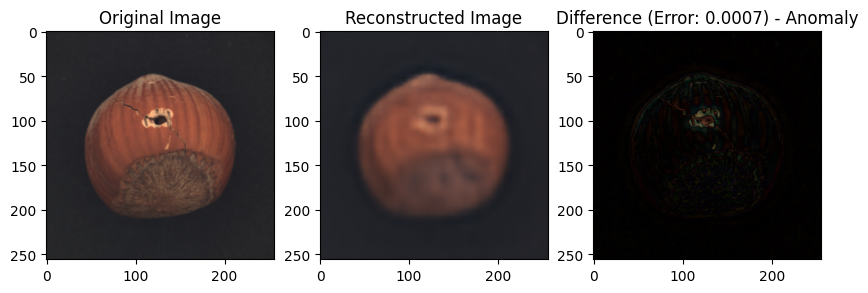

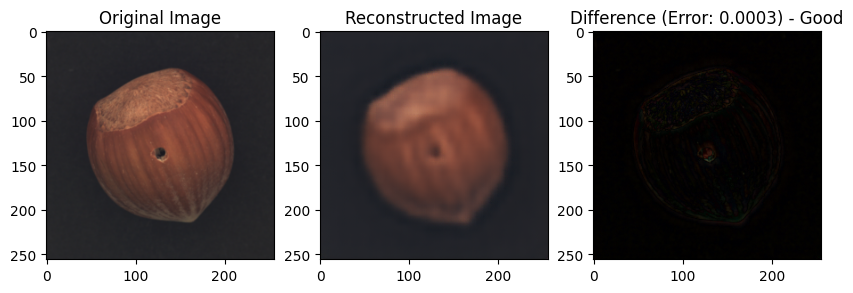

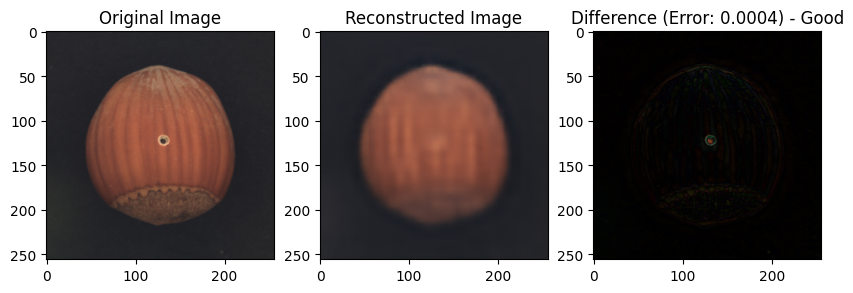

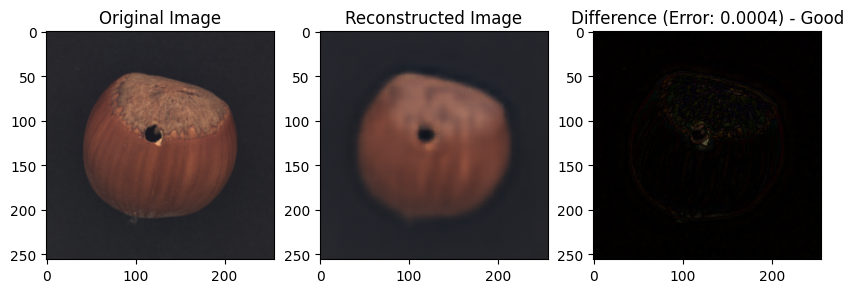

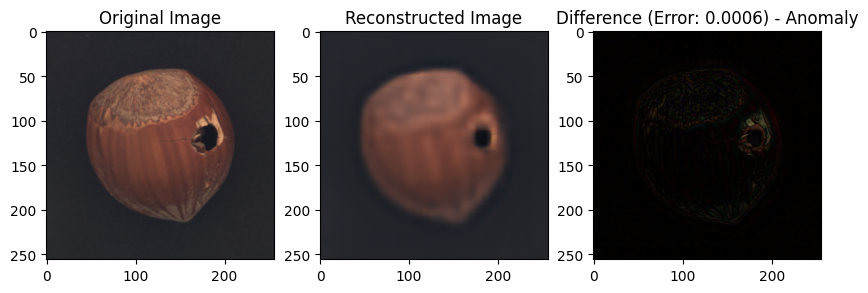

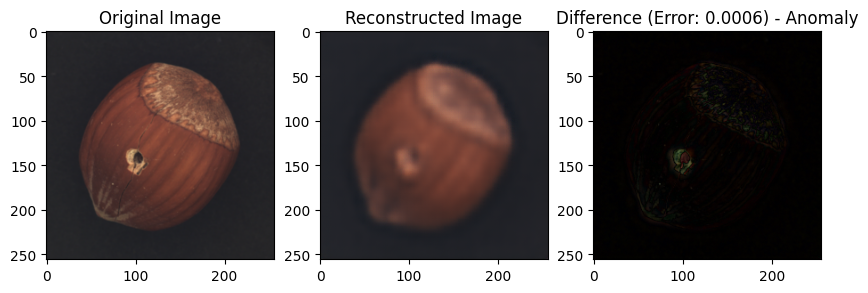

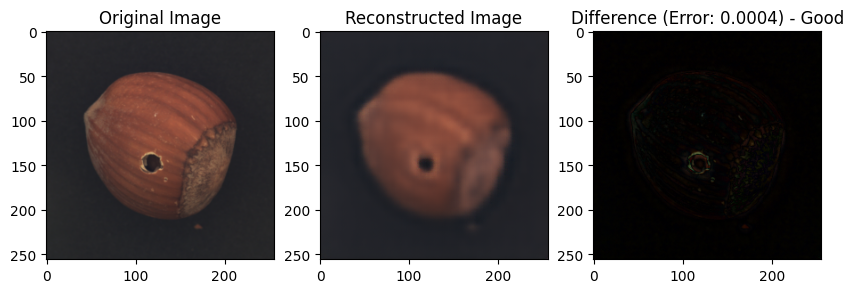

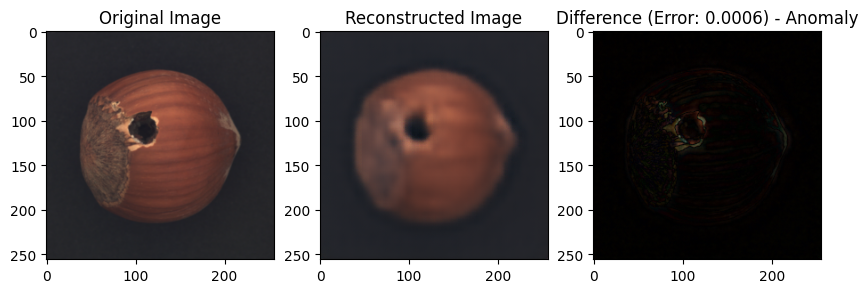

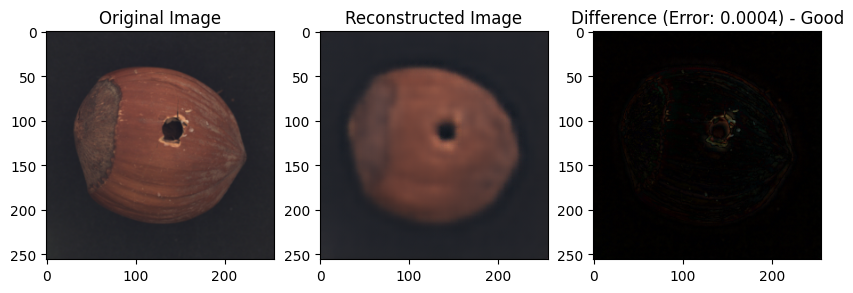

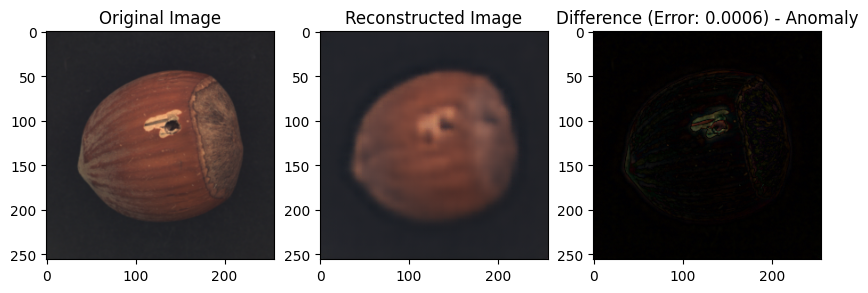

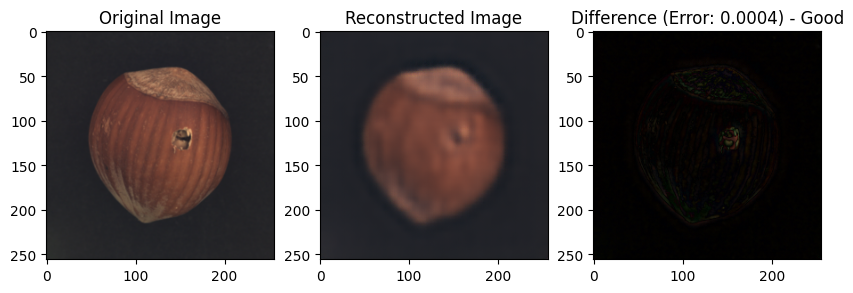

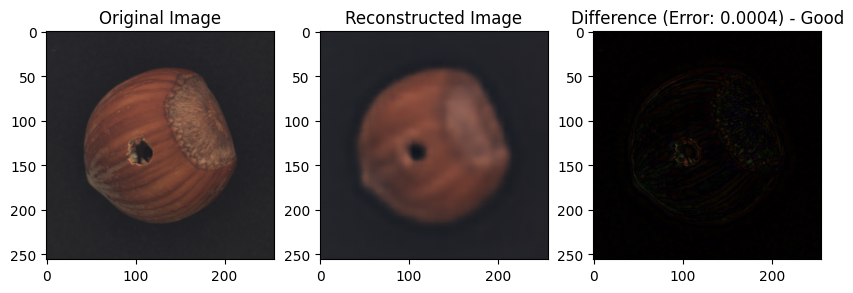

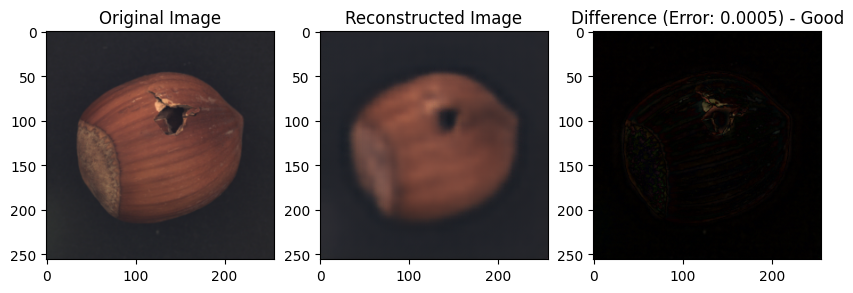

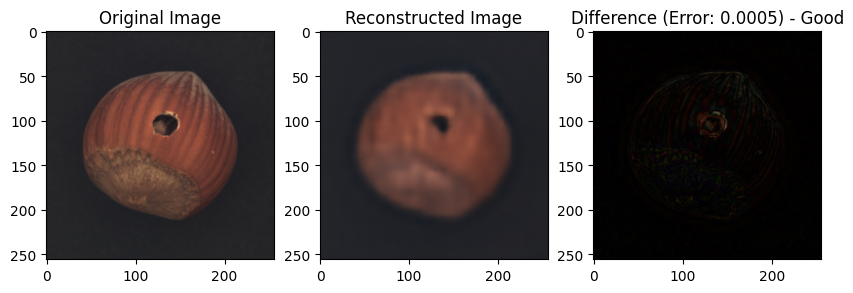

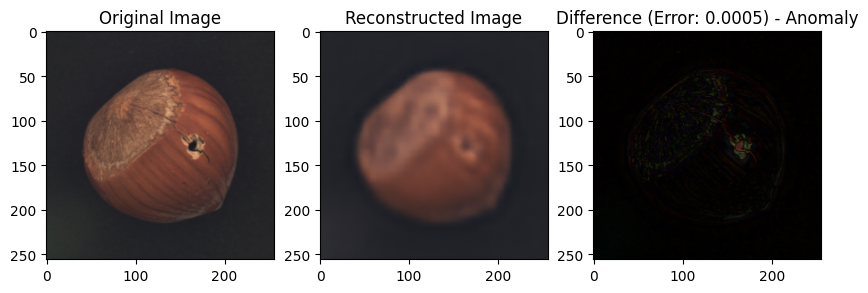

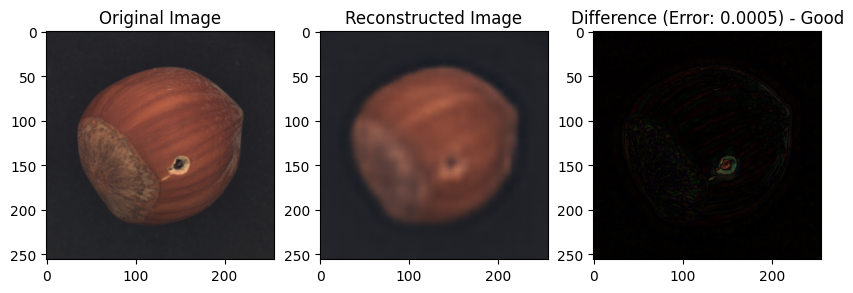

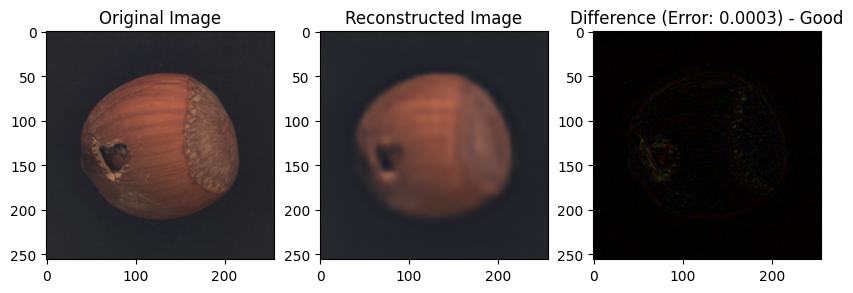

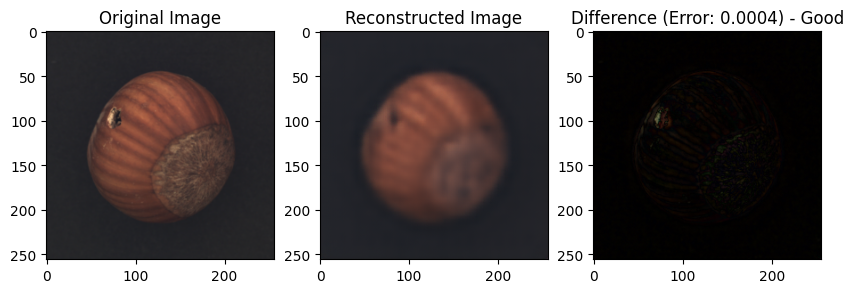

In [28]:
anomaly_threshold = 0.00053

with torch.no_grad():
    for test_image, img_path in test_loader:
        error, is_anomaly, original, reconstructed = detect_anomaly(autoencoder, test_image[0], threshold=anomaly_threshold)
        
        # Visualize original, reconstructed, and difference images
        plt.figure(figsize=(10, 3))
        
        # Original Image
        plt.subplot(1, 3, 1)
        plt.title("Original Image")
        plt.imshow(original[0].permute(1, 2, 0))
        
        # Reconstructed Image
        plt.subplot(1, 3, 2)
        plt.title("Reconstructed Image")
        plt.imshow(reconstructed[0].permute(1, 2, 0))

        # Difference Image
        plt.subplot(1, 3, 3)
        plt.title(f"Difference (Error: {error:.4f}) - {'Anomaly' if is_anomaly else 'Good'}")
        diff = torch.abs(original[0] - reconstructed[0])
        plt.imshow(diff.permute(1, 2, 0))
        
        # plt.suptitle(f"finding anomaly")
        plt.show()